# Ultimate Inc Data Science Take-Home Challenge
In this project we will be analyzing the logins of users of a ride-sharing platform, Ultimate Inc. 

## Part 1 - Exploratory Data Analysis
We will begin by investigating the logins.json file and doing some data analysis based on 15 minute intervals through the day across several months of time series data. 

#### Imports

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

#### File preparation

In [2]:
logins_filename = 'logins.json' 
ulti_filename   = 'ultimate_data_challenge.json'

In [3]:
logins_df = pd.read_json(logins_filename, convert_dates  = ['T'])

#### Data description

In [4]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


#### Time intervals

Looking at the description of the logins df we know our first 15 minute interval begins at 1970-01-01 20:00:00. While our last 15 minute interval is at 1970-04-13 19:00:00

We can use pd.date_range() to make our intervals

In [5]:
# Make a list of interval end points
start_times = pd.date_range(start='1970-01-01 20:00:00', 
                          end = '1970-04-13 18:45:00', 
                          freq='15min')
# Make a list of interval end points
end_times = pd.date_range(start='1970-01-01 20:15:00', 
                          end = '1970-04-13 19:00:00', 
                          freq='15min')

#### Separate the 15 minute intervals into dataframes based on time of day.

- Early AM: 00:00 through 04:59
- Morning: 05:00 through 08:59
- Midday: 09:00 through 11:59
- Afternoon: 12:00 through 16:59
- Evening: 17:00 through 19:59
- Night: 20:00 through 23:59

In [6]:
# Now we want to make a list of dataframes

logins_df_list = []
interval_login_counts = []

earlyAM_login_list = []
morning_login_list = []
midday_login_list = []
afternoon_login_list = []
evening_login_list = []
night_login_list = []

for start, end in zip(start_times, end_times):
    # This line is for debugging un-comment it to have the interval currently being worked on displayed.
#    print('Start Time:', start, ' End Time:', end)
    
    # Make the a new dataframe for each interval
    interval_df = logins_df[(logins_df['login_time'] > start) & 
                            (logins_df['login_time'] <= end)]
    interval_df.index = pd.RangeIndex(len(interval_df.index))
    
    # Get the count
    interval_count = len(interval_df)
    
    interval_login_counts.append(interval_count)
    
    # Assign it to the bigger list
    logins_df_list.append(interval_df)
    
    
    # Assign interval_df to time of day
    
    # Early AM: 00:00 through 04:59
    if (start.hour >= 0) & (start.hour < 5):
        earlyAM_login_list.append(interval_df)
    
    # Morning: 05:00 through 08:59
    elif (start.hour >= 5) & (start.hour < 9):
        morning_login_list.append(interval_df)
    
    # Midday: 09:00 through 11:59
    elif (start.hour >= 9) & (start.hour < 12):
        midday_login_list.append(interval_df)
    
    # Afternoon: 12:00 through 16:59
    elif (start.hour >= 12) & (start.hour < 17):
        afternoon_login_list.append(interval_df)
    
    # Evening: 17:00 through 19:59
    elif (start.hour >= 17) & (start.hour < 20):
        evening_login_list.append(interval_df)
    
    # Night: 20:00 through 23:59
    elif (start.hour >= 20) & (start.hour < 24):
        night_login_list.append(interval_df)

### Plot the entire time series

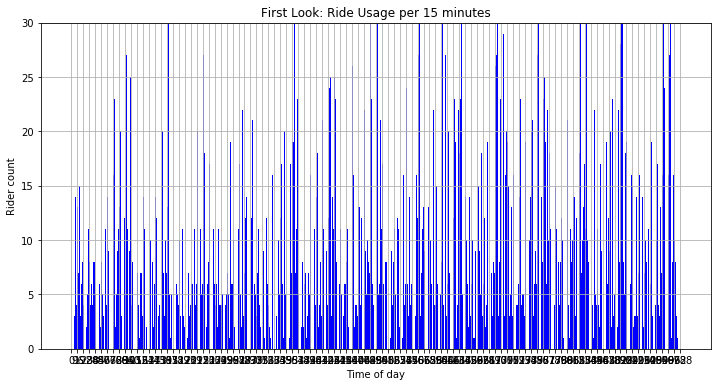

In [7]:
start_list = list(start_times)
t = np.arange(len(start_list))
interval_array = np.array(interval_login_counts)
# 103 days in the sample
daily_linspace = np.linspace(0, len(start_list), num = 103)

plt.figure(figsize=(12,6))
plt.bar(t, interval_array, color = 'blue')
plt.title('First Look: Ride Usage per 15 minutes')
plt.xticks(daily_linspace)
plt.xlabel('Time of day')
plt.ylabel('Rider count')
plt.ylim(0, 30)
plt.grid()
plt.show()
plt.clf()

There is certainly some kind of cyclical pattern above, but the plot is incredible hard to read. Looking at smaller sections of the plot should be very helpful. For example, we look at the first day, and first week of the time-series.

### Plots for the first day

Day One Line Plot


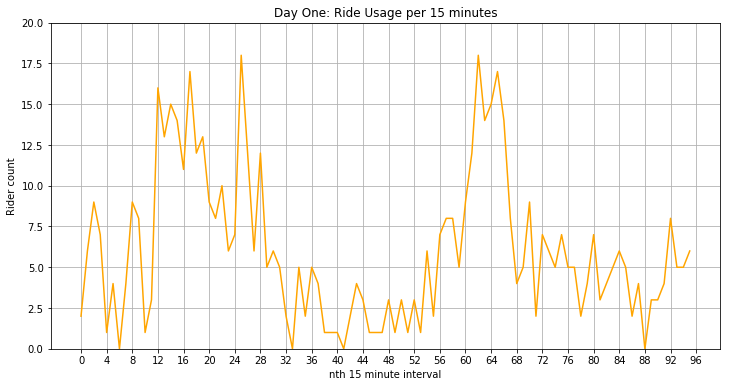

Day One Bar Plot


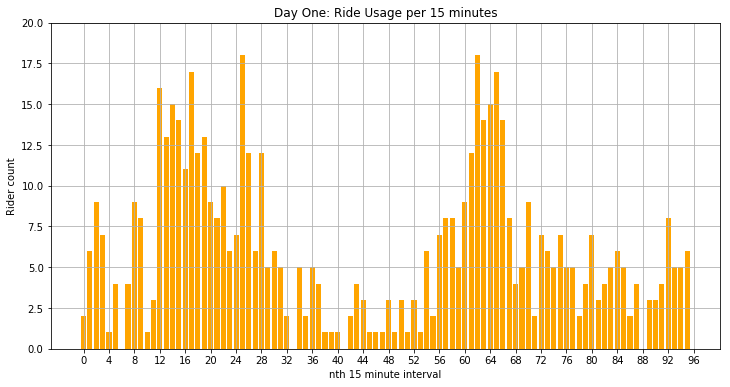

In [8]:
day_one_array = interval_array[0:96]
day_t = np.arange(96)
day_linspace = np.linspace(0, 96, 25)

print('Day One Line Plot')
day_one_array = interval_array[0:96]
day_t = np.arange(96)
day_linspace = np.linspace(0, 96, 25)

plt.figure(figsize=(12,6))
plt.plot(day_t, day_one_array, color = 'orange')
plt.title('Day One: Ride Usage per 15 minutes')
plt.xticks(day_linspace)
plt.xlabel('nth 15 minute interval')
plt.ylabel('Rider count')
plt.ylim(0, 20)
plt.grid()
plt.show()
plt.clf()

print('Day One Bar Plot')


plt.figure(figsize=(12,6))
plt.bar(day_t, day_one_array, color = 'orange')
plt.title('Day One: Ride Usage per 15 minutes')
plt.xticks(day_linspace)
plt.xlabel('nth 15 minute interval')
plt.ylabel('Rider count')
plt.ylim(0, 20)
plt.grid()
plt.show()
plt.clf()

A quick note. Each 4th 15 minute interval is an hour, so for example, the 20th 15 minute interval is 5 am. 

Notice that there is a lot of activity in the early hours of the morning between 3 and 6 am. This is probably due to late night activity in the city. 

### Plots for the first week





Week One Line Plot


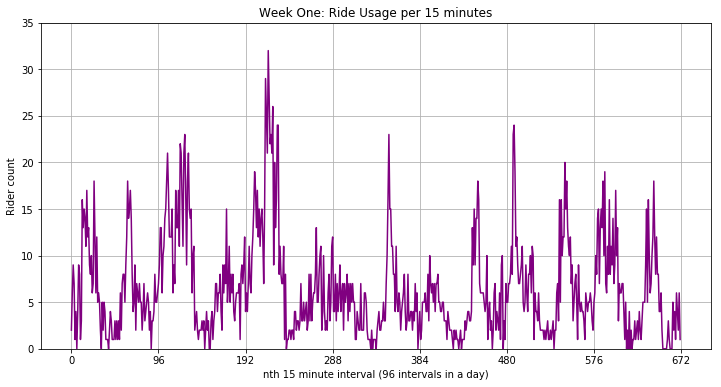

Week One Bar Plot


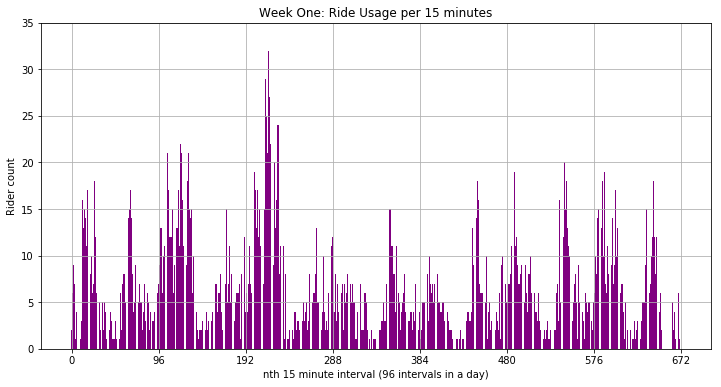

In [9]:
# First Week
print('\n\n\n')
print('Week One Line Plot')
week_one_array = interval_array[0:672]
week_t = np.arange(672)
week_linspace = np.linspace(0, 672, 8)

plt.figure(figsize=(12,6))
plt.plot(week_t, week_one_array, color = 'purple')
plt.title('Week One: Ride Usage per 15 minutes')
plt.xticks(week_linspace)
plt.xlabel('nth 15 minute interval (96 intervals in a day)')
plt.ylabel('Rider count')
plt.ylim(0, 35)
plt.grid()
plt.show()
plt.clf()


print('Week One Bar Plot')


plt.figure(figsize=(12,6))
plt.bar(week_t, week_one_array, color = 'purple')
plt.title('Week One: Ride Usage per 15 minutes')
plt.xticks(week_linspace)
plt.xlabel('nth 15 minute interval (96 intervals in a day)')
plt.ylabel('Rider count')
plt.ylim(0, 35)
plt.grid()
plt.show()
plt.clf()

There are some clear patterns that may be part of a day night cycle. Separating the times into times of day may elucidate things

#### Concatenating the time of day dataframes

In [10]:
earlyAM_login_df   = pd.concat(earlyAM_login_list)
morning_login_df   = pd.concat(morning_login_list)
midday_login_df    = pd.concat(midday_login_list)
afternoon_login_df = pd.concat(afternoon_login_list)
evening_login_df   = pd.concat(evening_login_list)
night_login_df     = pd.concat(night_login_list)


earlyAM_login_count   = len(earlyAM_login_df)
morning_login_count   = len(morning_login_df)
midday_login_count    = len(midday_login_df)
afternoon_login_count = len(afternoon_login_df)
evening_login_count   = len(evening_login_df)
night_login_count     = len(night_login_df)

time_titles = ['Early_AM', 'Morning', 'Midday', 'Afternoon', 'Evening', 'Night']
times_of_day_count_overall = [earlyAM_login_count,
                              morning_login_count,
                              midday_login_count,
                              afternoon_login_count,
                              evening_login_count,
                              night_login_count]

#### Plot the time of day bar chart

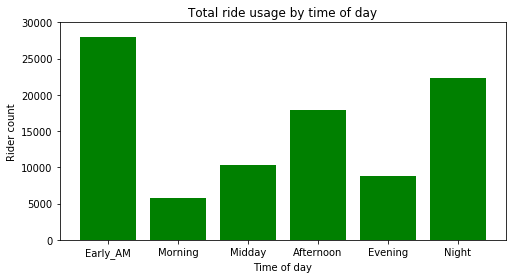

In [11]:
time_of_day_array = np.array(times_of_day_count_overall)
x = np.arange(6)

plt.figure(figsize=(8,4))
plt.bar(x, time_of_day_array, color = 'green')
plt.xticks(x,time_titles)
plt.title('Total ride usage by time of day')
plt.xlabel('Time of day')
plt.ylabel('Rider count')
plt.ylim(0, 30000)
plt.show()
plt.clf()

These plots key us in to the lifestyle in the city we are studying. The high uptick of riders in the afternoon, night-time, and early AM indicates a city where businesses open later in the day and are open all night. This would be indicative of a city with bustling nightlife such as Las Vegas, or in our fictional case: Gotham.

## Part 2 - Experiment and Metrics Design
Two neighboring cities, Gotham and Metropolis, have complimentary circadian rhythms. During the week Gotham is far more active at night, while Metropolis is active during the day. The two cities have similar schedules on weekends. 

A toll bridge, with a two way toll, separates the two cities and causes Ultimate drivers to tend to be exclusive to one city (else they would lose a sizable portion of their earnings to tolls). Ultimate managers for the two cities have proposed an experiment to encourage Ultimate drivers to be available in both cities, by reimbursing all toll costs. 

We are asked to address: 

1. What would we choose as the key measure of success of this experiment in encouraging Ultimate drivers to serve both cities, and why would we choose this metric?


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 
    -  How will Ultimate implement the experiment
    -  What statistical test(s) would Ultimate conduct to verify the significance of the observation
    -  How you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Part 2.1 
The key metric would be be surge, i.e the surge_pct and avg_surge values as these indicate how overtaxed the services are. That is to say, when demand outpaces supply surge rates are put into effect. These rates can deter customers, which ensures that wait times remain low, in line with user expectations. If these metrics decrease, this means that the toll bridge experiment could be providing the extra supply needed to reduce or even eliminate surge pricing. 

It should also be noted that the avg_dist variable could be of key importance during this experiment. If users in one city are now able to take an Ultimate ride to the other city the avg_dist value could increase to represent this new world of destination possibilites. It should be noted if previously Ultimate drivers were using a long alternative route to avoid the bridge, we could see avg_dist values decrease. So context regarding the city landscape is important when analyzing the results of the test. 

### Part 2.2 
The experiment would entail enabling bridge toll refunds for a series of months to all Ultimate driving partners, collecting the data for retention rates, and comparing this data to the historical data. 

#### Part 2.2a: How Will Ultimate Implement the Experiment?
Ultimate would implement this study by advertising it to their drivers as a new opportunitiy to capitalize on the different daily lifestyle patterns between the cities. Ultimate would register driving partners into the EzPass system which will provide an electronic receipt of all tolls. Ultimate would then set up the accounts to forward said toll billings to Ultimate, who would then process the associated tolls if the driver was taking a ride order or servicing a customer at that time. These rides would then have their data collected in the same fashion as the historical data and we would then compare surge_pct, avg_surge, and avg_dist over various periods.

#### Part 2.2b: What statistical test(s) would Ultimate conduct to verify the significance of the observation
We would use a Z-test to analyze values for avg_surge, surge_pct, and avg_dist as we know the mean and standard deviations of surge and average distance over historical time periods for the different cities. Here the sample means would be the means during the experiment, and the population mean would be the means outside of the experiment.

#### Part 2.2c: How you would interpret the results and provide recommendations to the city operations team along with any caveats.
Given a p value low enough (<0.05) to reject the null hypothesis I would acknowledge that the toll reimbursement plan contributed to lowering the surge rates. I would then recommend that the city operations teams consider making this a policy that we continue to implement moving forward. Moreover, I would recommend that they advertise the exciting city interconnectivity Ultimate now provides to customers in both cities. 

An important caveat is that the city operations teams should be working together to ensure that they have driving partners at the ready for transition times between the active daytime life of Metropolis and the nightlife of Gotham, as these are the hours that were formerly not as profitable for Ultimate partners before the experiment. 

## Part 3 - Predictive Modeling

#### Imports
The imports are redone in case the reader would like to run this section of the code separately without searching for prior imports

In [12]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

#### File Preparation

In [13]:
ulti_filename   = 'ultimate_data_challenge.json'

with open(ulti_filename) as f:
    ulti_data = json.load(f)

ulti_df = pd.DataFrame(ulti_data)

#### Create separate data frames for retained and non-retained users

In [14]:
zero_user_df     = ulti_df.loc[ulti_df['trips_in_first_30_days'] == 0]
retained_user_df = ulti_df.loc[ulti_df['trips_in_first_30_days'] != 0]

### Part 3 Exploratory Data Analysis
#### Part 3.1 Conduct EDA and determine Feature Importances for a Predictive model regarding one month customer retention rates.

In [15]:
zero_user_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,15390.000000,15296.000000,11641.000000,15390.000000,15390.000000,15390.0,15390.000000
mean,6.397854,4.791200,4.632721,1.071320,8.512982,0.0,61.299350
std,6.527654,0.499961,0.655351,0.238503,22.000314,0.0,41.312242
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000
25%,2.350000,4.800000,4.500000,1.000000,0.000000,0.0,16.700000
50%,4.150000,5.000000,5.000000,1.000000,0.000000,0.0,75.000000
75%,8.060000,5.000000,5.000000,1.000000,0.000000,0.0,100.000000
max,160.960000,5.000000,5.000000,5.000000,100.000000,0.0,100.000000


In [16]:
retained_user_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,34610.000000,34503.000000,30237.000000,34610.000000,34610.000000,34610.000000,34610.000000
mean,5.529568,4.772376,4.589562,1.076295,8.999191,3.291245,60.760104
std,5.280161,0.420742,0.601646,0.214742,18.979042,4.176923,35.035881
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2.450000,4.700000,4.300000,1.000000,0.000000,1.000000,37.500000
50%,3.800000,5.000000,4.900000,1.000000,0.000000,2.000000,66.700000
75%,6.520000,5.000000,5.000000,1.070000,10.800000,4.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


Notice the only non-definitional category with a visibly different mean is the avg_dist variable with a 15.7% difference in the value. Notice that the standard deviation is nearly the size of the mean. This indicates that there is a high variance in the distance that customers travel. 

For our model we will consider all of the numerical values aside from the trips_in_first_30_days variable, as it is used to define the difference between retained and non-retained users.

### Analysis of Boolean Variables

#### Ultimate Black Car 

In [17]:
retained_user_percent = len(retained_user_df)/ len(ulti_df) 
print('Ultimate retains', '%.2f' % (retained_user_percent*100), '%', 'of all users \n\n')

# Does the ultimate black service contribute to the difference
zero_user_percent_ub = zero_user_df['ultimate_black_user'].sum() / len(zero_user_df)
retained_user_percent_ub =  retained_user_df['ultimate_black_user'].sum() / len(retained_user_df)

# Non-retained users used ultimate black 34%
print("%.2f" % (zero_user_percent_ub*100), '%', 'of Non-retained users used ultimate black for their first ride')
# Reatined users used ultimate black 39%
print("%.2f" % (retained_user_percent_ub*100), '%', 'of Non-retained users used ultimate black for their first ride')

# What percentage of people that used ultimate black retained?
# 37 percent of all users used ultimate black their first ride
# 69.22% of users retained

black_car_user_df = ulti_df.loc[ulti_df['ultimate_black_user'] == True]
# 18854 users are black_car_users
zero_black = black_car_user_df.loc[black_car_user_df['trips_in_first_30_days'] == 0]
retain_black = black_car_user_df.loc[black_car_user_df['trips_in_first_30_days'] != 0]
black_retention_rate = len(retain_black) / len(black_car_user_df)

print('Ultimate Black car retains', "%.2f" % (black_retention_rate*100), '%', 'of users.')
# Black car retains 71.47% of users. So slgihtly higher. 

Ultimate retains 69.22 % of all users 


34.95 % of Non-retained users used ultimate black for their first ride
38.93 % of Non-retained users used ultimate black for their first ride
Ultimate Black car retains 71.47 % of users.


This indicates Ultimate black may be a useful predictor, we will want to include it in the model. 

#### Retention by City

In [18]:
######################
# Retention By City
######################
# Cites are Astapor, King's Landing, and Winterfell

# Astapor
zero_Astapor     = zero_user_df.loc[zero_user_df['city'] == 'Astapor']
retained_Astapor = retained_user_df.loc[retained_user_df['city'] == 'Astapor']

retention_rate_Astapor = len(retained_Astapor) / (len(retained_Astapor) + len(zero_Astapor))
# 67.745%
print('Ultimate Black car retained', "%.2f" % (retention_rate_Astapor*100), '%', 'of users whose first ride originated from Astapor.')


# King's Landing
zero_Kings     = zero_user_df.loc[zero_user_df['city'] == 'King\'s Landing']
retained_Kings = retained_user_df.loc[retained_user_df['city'] == 'King\'s Landing']

retention_rate_Kings = len(retained_Kings) / (len(retained_Kings) + len(zero_Kings))
# 65.13%
print('Ultimate Black car retained', "%.2f" % (retention_rate_Kings*100), '%', 'of users whose first ride originated from King\'s Landing.')

# Winterfell
zero_Winter     = zero_user_df.loc[zero_user_df['city'] == 'Winterfell']
retained_Winter =retained_user_df.loc[retained_user_df['city'] == 'Winterfell']
 
retention_rate_Winter = len(retained_Winter) / (len(retained_Winter) + len(zero_Winter))
# 72.04 %
print('Ultimate Black car retained', "%.2f" % (retention_rate_Winter*100), '%', 'of users whose first ride originated from Winterfell.')



Ultimate Black car retained 67.75 % of users whose first ride originated from Astapor.
Ultimate Black car retained 65.13 % of users whose first ride originated from King's Landing.
Ultimate Black car retained 72.04 % of users whose first ride originated from Winterfell.


The high percentage of retained users in Winterfell certainly stands out. Perhaps city traffic patterns allow for shorter wait times, or maybe it is a low crime rate neighborhood where people feel more comfortable ride-sharing. This will certainly be included in the model.

#### Retention by Phone type

In [19]:
######################
# Retention By phone
######################
# iPhone
zero_iPhone     = zero_user_df.loc[zero_user_df['phone'] == 'iPhone']
retained_iPhone = retained_user_df.loc[retained_user_df['phone'] == 'iPhone']

retention_rate_iPhone = len(retained_iPhone) / (len(retained_iPhone) + len(zero_iPhone))
# 69.07%
print('Ultimate Black car retained', "%.2f" % (retention_rate_iPhone*100), '%', 'of users who signed up via iPhone.')


# Android
zero_Android    = zero_user_df.loc[zero_user_df['phone'] == 'Android']
retained_Android = retained_user_df.loc[retained_user_df['phone'] == 'Android']

retention_rate_Android = len(retained_Android) / (len(retained_Android) + len(zero_Android))
# 69.265%
print('Ultimate Black car retained', "%.2f" % (retention_rate_Android*100), '%', 'of users who signed up via Android.')


Ultimate Black car retained 69.07 % of users who signed up via iPhone.
Ultimate Black car retained 69.27 % of users who signed up via Android.


There is almost no difference in this case, it can be left out of the model.

### Modeling
#### Type of model 
As we are predicting whether or not users are retained or not after a time period we will want to use a classification model. We will use a Random Forest Classifier to help elucidate feature importances. We will copy the ulti_df dataframe and add a classification column. 

#### Feature Selection 
We will include all numerical models alongside the Black Car and City variables which will need to be quantified. To quantify the Black Car and City variables we will make new columns Black_quant and city_quant with values 0,1 in the case of black car, and values 1,2,3 in the case of city_quant for Astapor, Winterfell, and King's Landing respectively. 

In [20]:
new_ulti_df = ulti_df.copy(deep = True)

#### Classify based on retention

In [21]:
retained_classification = []
for i in range(len(new_ulti_df)):
    if new_ulti_df['trips_in_first_30_days'][i] == 0:
        retained_classification.append(0)
    else:
        retained_classification.append(1)

In [22]:
new_ulti_df['retained_classification'] = retained_classification

#### Classify by Black Car

In [23]:
black_car_classification = []
for i in range(len(new_ulti_df)):
    if new_ulti_df['ultimate_black_user'][i] == 0:
        black_car_classification.append(0)
    else:
        black_car_classification.append(1)

In [24]:
new_ulti_df['black_car_classification'] = black_car_classification

#### Classify by City

In [25]:
city_classification = []
for i in range(len(new_ulti_df)):
    if new_ulti_df['city'][i] == 'Astapor':
        city_classification.append(1)
        
    elif new_ulti_df['city'][i] == 'King\'s Landing':
         city_classification.append(2)
    else: 
        city_classification.append(3)

In [26]:
new_ulti_df['city_classification'] = city_classification

In [27]:
new_ulti_df.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_classification,black_car_classification,city_classification
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,1,2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,1,2
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1,0,3


#### Machine Learning Imports

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Create a version of new_ulti_df including only numeric columns.


In [29]:
%%capture
df = new_ulti_df._get_numeric_data()
df.dropna(inplace = True)
df.drop('ultimate_black_user', axis = 1, inplace = True)

# Drop NA Values. They only appeared in the avg_rating of driver. In a longer time frame study I would recommend looking into
# the cases with NA values as a separate dataframe. Maybe those customers were so dissatisfied that they did not want to leave a rating. 


#### A quick look at the new dataframe

In [30]:
df.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained_classification,black_car_classification,city_classification
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1,2
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,1
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,1
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1,2
4,3.13,4.9,4.4,1.19,11.8,14,82.4,1,0,3


#### Select feature columns, exclude the label column

In [31]:
ml_cols = [col for col in df.columns if col not in ['retained_classification', 'trips_in_first_30_days']]

#### Construct the Random Forest Classifier

In [32]:
X = df[ml_cols]
y = df['retained_classification'] # The label column
# from sklearn import preprocessing
# X = preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)  # , random_state = 42


In [33]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.cross_validation import cross_val_score
print('Ten fold Cross Validated Accuracy score:', 
      '%.4f' % np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

Ten fold Cross Validated Accuracy score: 0.6646


#### Hyperparameter Tuning

In [34]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# The following is revised from the documentation for randomized search cv.

# Utility function to report best scores
def report(results, n_top=1):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [5, 8, 15, 25, 30],
              "max_features": sp_randint(1, 8),
              "min_samples_split": sp_randint(2, 100),
              "min_samples_leaf": sp_randint(1, 10),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(X_train, y_train)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.722 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 27}

Model with rank: 1
Mean validation score: 0.722 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 19}



In [35]:
clf_rcv = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth =  8, max_features =  3, min_samples_leaf = 2, min_samples_split = 46)
clf_rcv.fit(X_train, y_train)

y_pred = clf_rcv.predict(X_test)
from sklearn.cross_validation import cross_val_score
print('Ten fold Cross Validated Accuracy score:', 
      '%.4f' % np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

Ten fold Cross Validated Accuracy score: 0.6582


This generates the hyperparameter tuned Random Forest Classifier to yield our feature importances for determining which users will be retained over a 30 day period. Our next step is to understand these importances and tackle the 6-month problem.

Variable: avg_rating_by_driver Importance: 0.27
Variable: surge_pct            Importance: 0.22
Variable: weekday_pct          Importance: 0.2
Variable: avg_dist             Importance: 0.11
Variable: avg_rating_of_driver Importance: 0.06
Variable: city_classification  Importance: 0.06
Variable: avg_surge            Importance: 0.05
Variable: black_car_classification Importance: 0.01


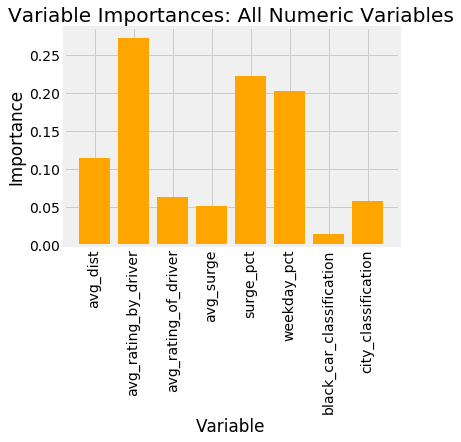

In [36]:
# Get numerical feature importances
importances = list(clf_rcv.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(ml_cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], 
                             reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'orange')

# Tick labels for x axis
plt.xticks(x_values, ml_cols, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable');
plt.title('Variable Importances: All Numeric Variables'); 
plt.show()
plt.clf()

The problem statement describes different behavior during the weekdays and weekends so let's edit ml_cols and try again. 

In [37]:
ml_cols.remove('weekday_pct')

In [38]:
X = df[ml_cols]
y = df['retained_classification'] # The label column
# from sklearn import preprocessing
# X = preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)  # , random_state = 42

clf_rcv = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth =  8, max_features =  3, min_samples_leaf = 2, min_samples_split = 46)
clf_rcv.fit(X_train, y_train)

y_pred = clf_rcv.predict(X_test)
from sklearn.cross_validation import cross_val_score
print('Ten fold Cross Validated Accuracy score:', 
      '%.4f' % np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

Ten fold Cross Validated Accuracy score: 0.6506


Variable: avg_rating_by_driver Importance: 0.26
Variable: surge_pct            Importance: 0.25
Variable: avg_dist             Importance: 0.16
Variable: avg_surge            Importance: 0.16
Variable: avg_rating_of_driver Importance: 0.1
Variable: city_classification  Importance: 0.06
Variable: black_car_classification Importance: 0.02


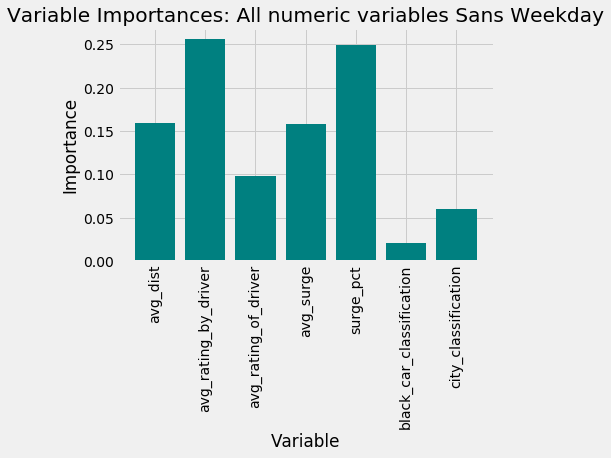

In [39]:
# Get numerical feature importances
importances = list(clf_rcv.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(ml_cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], 
                             reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'teal')

# Tick labels for x axis
plt.xticks(x_values, ml_cols, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable');
plt.title('Variable Importances: All numeric variables Sans Weekday'); 
plt.show()
plt.clf()

Average rating by the driver is not something we can control, but it does give some insight into the idea that problematic customers are less likely to use the service. As those who receive low driver rating were likely unpleasant which would lead to a negative experience. Let's try again without acvg_rating_by_driver.

In [40]:
ml_cols.remove('avg_rating_by_driver')

Ten fold Cross Validated Accuracy score: 0.6486
Variable: surge_pct            Importance: 0.31
Variable: avg_surge            Importance: 0.21
Variable: avg_dist             Importance: 0.2
Variable: avg_rating_of_driver Importance: 0.19
Variable: city_classification  Importance: 0.08
Variable: black_car_classification Importance: 0.01


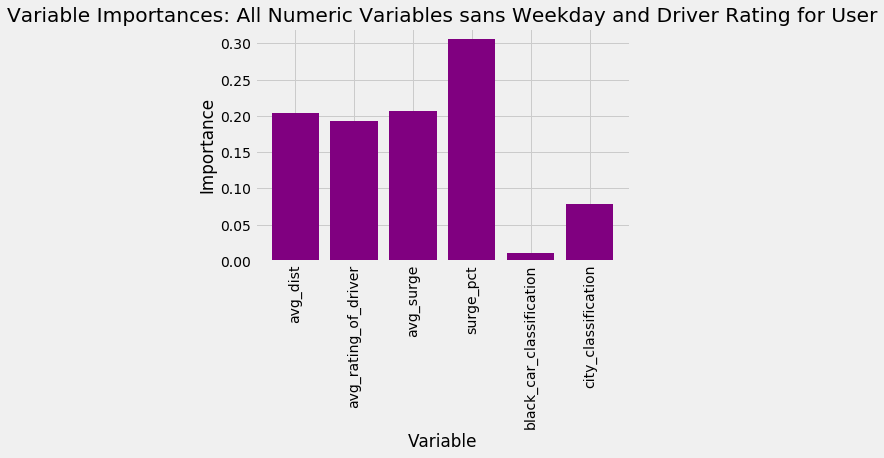

In [41]:
X = df[ml_cols]
y = df['retained_classification'] # The label column
# from sklearn import preprocessing
# X = preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)  # , random_state = 42

clf_rcv = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth =  8, max_features =  3, min_samples_leaf = 2, min_samples_split = 46)
clf_rcv.fit(X_train, y_train)

y_pred = clf_rcv.predict(X_test)
from sklearn.cross_validation import cross_val_score
print('Ten fold Cross Validated Accuracy score:', 
      '%.4f' % np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

# Get numerical feature importances
importances = list(clf_rcv.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(ml_cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], 
                             reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'purple')

# Tick labels for x axis
plt.xticks(x_values, ml_cols, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable');
plt.title('Variable Importances: All Numeric Variables sans Weekday and Driver Rating for User'); 
plt.show()
plt.clf()

All of these variables are informative and key us into different ideas. As discussed prior in Part 2, surge percentage show cases that the driver supply meeting customer demand is a dramatically important task. And as expected the user experience with the driving partner is also quite important. 

### Part 3.2
Next we look to predict user behavior 6 months out. That is, which users will remain active for each of the 6 months after their signup?

The simplest solution is applicable if the following assumption holds true:
A user's probability to stay retained for any given month remains the same each month regardless of how many months they have used the service. 

In that case we simply take the product of independent probabilities

In [42]:
retain_probs = clf_rcv.predict_proba(X_test)[:,1]
six_month_indep_probs = np.power(retain_probs, 6)
avg_six_month_prob = np.average(six_month_indep_probs)
print('Average six month probability:', '%.2f%%' %(100*avg_six_month_prob))

Average six month probability: 20.21%


This model is very basic and merely relies on the model we have already created and tuned. This means that any error that exists in our previous model perpetrates through this model exponentially. However, this would also occur if we were to take the predictions from our model and repeatedly use them as inputs for the model. This method is significantly faster and is more intuitive than the mentioned alternative. 

While the individual month model is fairly valid, the assumption that a user's retention rate per month is unaffected by how many months they have already retained in the app has flaws. Some customers may grow tired of the service and look for the latest and greatest innovation, while other could develop brand loyalty. This is outside of the scope of the project however, but would be an interesting study for the field of ride-sharing services at leage. 

#### Part 3.3
Both parts 3.1 and 3.2 point to the idea that a customer's intital experience with Ultimate is incredibly important. Every step and precaution to ensure that the ride is excellent should be taken. I would suggest that Ultimate look into several avenues of improvement: 
1. Create a new customer program
    - Waive all surge fees for new customers
    - Attempt to connect them with only experienced highly rated drivers. 
    - Inform their driver that the rider is new to the service.
    
    
    
2. Implement the experiment discussed in Part 2. Surge_pct is the most important variable, and increasing driver supply in each city at their respective peak hours will reduce surges and improve customer experience. 



3. Enforce a system that educates or weeds out underperforming drivers. 
    - Lenient enough that it can help potentially great drivers work hard and succeed.
    - Strict enough that repeatedly lacking drivers are removed from the system.
   